In [1]:
import os
import numpy as np
import imageio.v2 as imageio
import scipy.ndimage
import cv2
from IPython.display import display, Image

In [2]:
def grayscale(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.114])

In [3]:
def dodge(front, back):
    result = np.zeros_like(front)
    mask = back == 255
    result[mask] = 255
    mask = back != 255
    result[mask] = np.clip((front[mask] * 255.0 / (255 - back[mask])), 0, 255)
    return result.astype('uint8')

In [8]:
# nama file gambar
nama_file = "spongebob.jpg"
nama_file_convert = os.path.splitext(nama_file)[0] + "_convert.png"

In [9]:
# membaca gambar dan memprosesnya
s = imageio.imread(nama_file)
g = grayscale(s)
i = 255-g
b = scipy.ndimage.gaussian_filter(i, sigma=10)
r = dodge(b,g)

In [10]:
# menyimpan gambar hasil
cv2.imwrite(nama_file_convert, r)

True

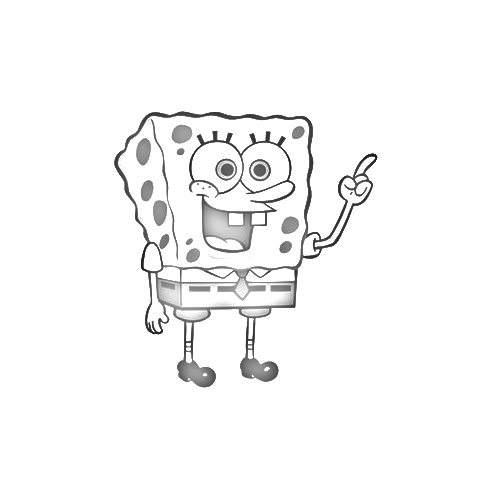

In [11]:
# menampilkan gambar hasil
display(Image(filename=nama_file_convert))